# V8 MNE ARTIFACT BUILDING AND DEPLOYMENT

## SOURCES

https://c3energy.atlassian.net/wiki/spaces/ENG/pages/8219821535/Deploying+an+artifact+to+an+external+cluster+8.3+and+8.4

Pre-requisites
C3 AI Platform running with the following apps started and configured correctly: Deploying C3 Release Management in production (8.2)

Studio (name: studio , rootpkg: studio)

Release Management (name: jarvisservice , rootpkg: jarvisService)

Artifact Hub (name: artifacthubservice , rootpkg: artifactHubService)

In [ ]:
For Gen AI, just make sure that Jarvis is on the same server version that you are starting the app with

In [ ]:
https://gkev8c3apps.c3-e.com/blitztest/studio/branches/github-c3-e-c3fed-cornea--cornea%2Frelease4/17

get semantic version and triple click 

https://gkev8c3apps.c3-e.com/blitztest/studio/branches/github-c3-e-c3fed-cornea--cornea%2Frelease4/17/guruSearchUI

8.3.2+cornea.release4.17.d087f4375501a7627fd6cfe9bc60492c29aedd59


In [ ]:
## Get package

var PACKAGE_NAME = "";
c3Grid(ArtifactHubService.Artifact.fetch({filter: Filter.inst().eq('name', PACKAGE_NAME)}));

https://gkev8c3apps.c3-e.com/blitztest/artifacthubservice/static/console/index.html

In [ ]:
//See all the artifacts for a specific version 
c3Grid(ArtifactHubService.Artifact.fetch({filter: Filter.inst().eq('semanticVersion', SEMANTIC_VERSION)}));

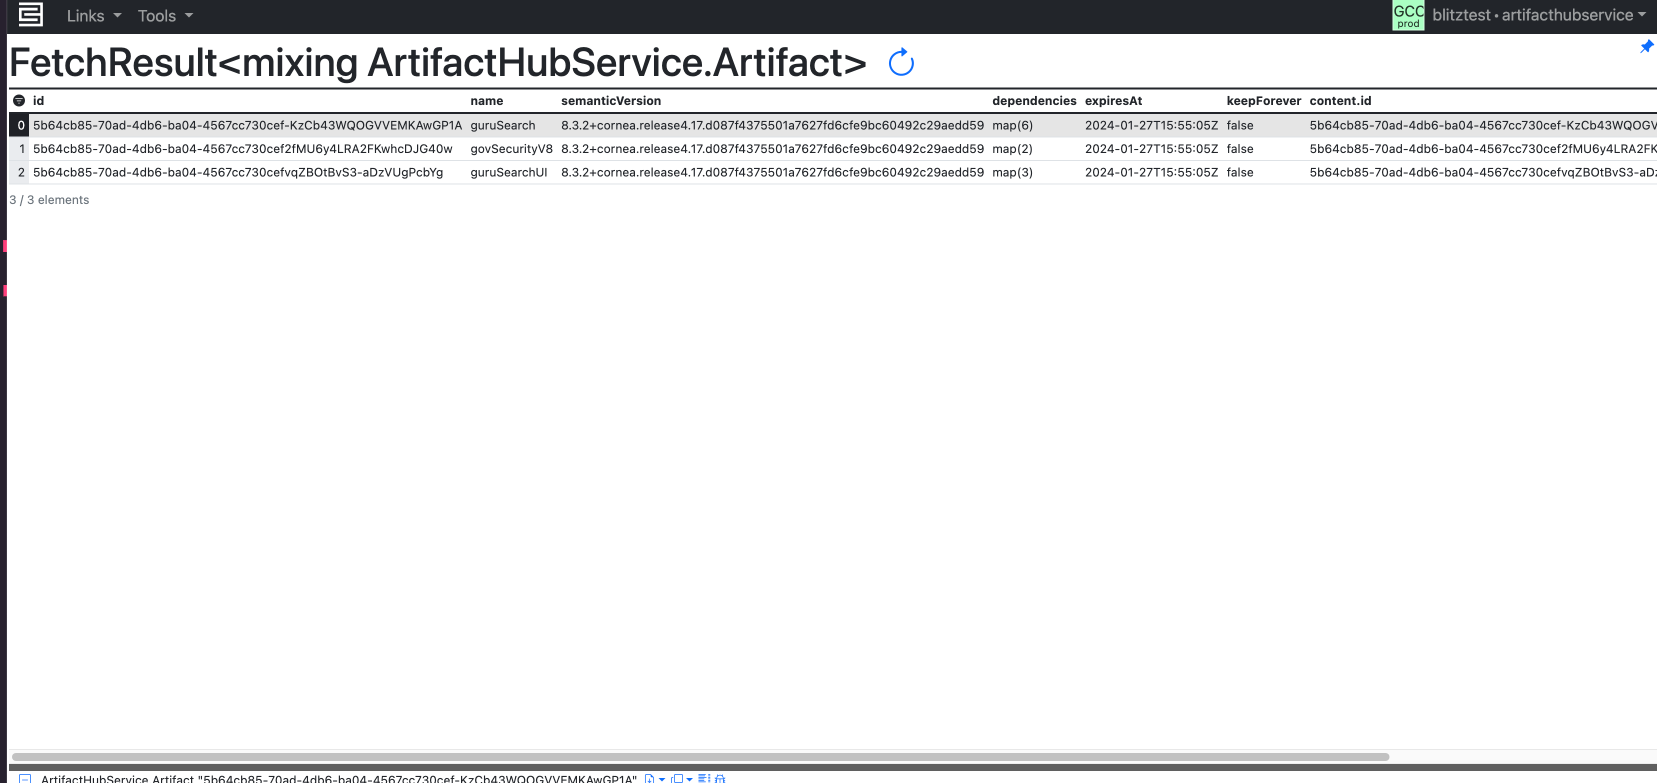

In [ ]:
var PACKAGE_NAME = "guruSearchUI";
var PACKAGE_VERSION = "";

function download(artifact) {
    var contentLocation = ArtifactHubService.Artifact.make(artifact.id).get().content.get().contentLocation;
    var fileUrl = C3.File.make(contentLocation).apiEndpoint("GET", true);
    var downloadName = artifact.name + artifact.semanticVersion + '.zip';

    const link = document.createElement('a');
    link.href = fileUrl;
    link.download = downloadName;
    link.click();
}

var rootPkg = PACKAGE_NAME;
var semanticVersion = SEMANTIC_VERSION;
var artifact = ArtifactHub.artifactForVersion(rootPkg, semanticVersion);
download(artifact);

In [ ]:
var artifact = ArtifactHub.artifactForVersion(rootPkg, semanticVersion);
artifact = artifact.withoutDependencies()
  .withoutFlattenedDependencies()
  .withoutResolvedDependencies()
  .withContent({ id: artifact.content.id.split('/').pop() });

// Copy JSON to clipboard
copy(artifact.toJson());

In [ ]:
example output:

In [ ]:
{
    "id": "5b64cb85-70ad-4db6-ba04-4567cc730cefvqZBOtBvS3-aDzVUgPcbYg",
    "name": "guruSearchUI",
    "semanticVersion": "8.3.2+cornea.release4.17.d087f4375501a7627fd6cfe9bc60492c29aedd59",
    "content": {
        "id": "guruSearchUI.zip"
    }
}

## END ENV 1

## START ENV 2

In [ ]:
{
    "id": "5b64cb85-70ad-4db6-ba04-4567cc730cefvqZBOtBvS3-aDzVUgPcbYg",
    "name": "guruSearchUI",
    "semanticVersion": "8.3.2+cornea.release4.17.d087f4375501a7627fd6cfe9bc60492c29aedd59",
    "content": {
        "id": "guruSearchUI.zip"
    }
}

https://gkev8genai.c3-e.com/c3/artifacthubservice/static/console/index.html

In [ ]:
//See all the artifacts for a specific version 
var NAME = "guruSearchUI";
c3Grid(ArtifactHubService.Artifact.fetch({filter: Filter.inst().eq('name', NAME)}));

In [ ]:
function createUploadButton(artifact) {
    var contentLocation = artifact.content.contentLocation;
    var url = C3.File.make(contentLocation).apiEndpoint("PUT", true);
    var input = document.createElement("input");
    input.type = "file";
    input.accept = ".zip";
    input.addEventListener("change", function (event) {
      var file = event.target.files[0];
      if (file) {
        console.log("uploading file");
  
        var headers = new Headers();
        headers.append("Content-Type", "application/zip");
        var request = new Request(url, {
          method: "PUT",
          credentials: 'same-origin',
          headers: headers,
          body: file,
        });
  
        fetch(request)
          .then((response) => {
            if (response.ok) {
              console.log('upload done');
              console.log('updating contentLength');
              ArtifactHubService.updateContentMetadata(artifact.content);
              console.log('contentLength updated');
              console.log('setting expiration');
              if (SemanticVersion.gte(C3.app().serverVersion, '8.3.1-0')) {
                ArtifactHubService.updateExpiration({
                  filter: Filter.inst().eq('id', artifact.id)
                }, null, true);
              }
              console.log('expiration updated to keep forever');
            } else {
              throw new Error("Upload failed");
            }
          })
          .then((text) => console.log(text))
          .catch((error) => console.error("Error:", error));
      }
    });
    return input;
  }
  
  var artifact = ArtifactHub.Artifact.Pkg.make(<paste from clipboard above>)
  artifact = artifact
    .withoutDependencies()
    .withoutFlattenedDependencies()
    .withoutResolvedDependencies()
    .withContent({ id: artifact.content.id.split("/").pop() })
    .register();
  
  var uploadButton = createUploadButton(artifact);
  uploadButton.click();
  
  // <= 8.3.1 you may have to run this to remove the stale public keys
  var l = Lambda.fromJsSrc(() => {
    AppIdentity.listConfigKeys().each(id => AppIdentity.forId(id).clearConfigAndSecretOverride(ConfigOverride.APP));
  })
  App.forName('artifacthubservice').callJson('Lambda', 'call', l.toJson())

In [ ]:
// upload zip from env 1
// console will output following message after completion:

uploading file
VM292:24 upload done
VM292:25 updating contentLength
VM292:27 contentLength updated
VM292:28 setting expiration
VM292:34 expiration updated to keep forever
VM29

## END ENV 2 UPLOAD

## START DEPLOYING ARTIFACT IN ENV 2

https://c3energy.atlassian.net/wiki/spaces/ENG/pages/8220181664/Deploying+an+artifact+to+the+same+cluster+8.3+and+8.4

In [ ]:
validate access to environment: https://gkev8genai.c3-e.com/gururelease/release/static/console/index.html

Note -- in order to deploy new app 

In [ ]:
Get app ID
App.listConfigs().collect()

id --> gkev8genai-gururelease-release

{
    "type": "App",
    "label": "release",
    "rootPkg": "guruSearchUI",
    "rootPkgVersion": "8.3.2+cornea.release4.10.d087f4375501a7627fd6cfe9bc60492c29aedd59",
    "mode": "dev",
    "id": "gkev8genai-gururelease-release",
    "meta": {
        "startedBy": {
            "id": "9982886e49793305f31f6d1e2947eb9976ee5ecdc795712b0d7a8f86aabc67d4"
        },
        "started": "2024-01-05T21:49:07Z",
        "lastUpdatedBy": {
            "id": "worker",
            "name": "worker"
        },
        "lastUpdated": "2024-01-12T15:31:25Z"
    },
    "configOverride": "CLUSTER",
    "name": "release",
    "code": "1787288719001790270",
    "cloudServiceUrls": {
        "type": "Array<CloudServiceUrl>",
        "value": [
            {
                "urlMap": {
                    "type": "Map<string, string>",
                    "value": {
                        "gkev8genai-gururelease-release-k8sjup-cs-001": "http://cs-8364488f69-proxy-public/gururelease/release/jupyter/"
                    }
                }
            },
            {
                "urlMap": {
                    "type": "Map<string, string>",
                    "value": {
                        "gkev8genai-gururelease-release-k8sjup-cs-001": "http://cs-8364488f69-proxy-public/gururelease/release/jupyter/"
                    }
                }
            },
            {
                "urlMap": {
                    "type": "Map<string, string>",
                    "value": {
                        "gkev8genai-gururelease-release-k8sjup-cs-001": "http://cs-8364488f69-proxy-public/gururelease/release/jupyter/"
                    }
                }
            },
            {
                "urlMap": {
                    "type": "Map<string, string>",
                    "value": {
                        "gkev8genai-gururelease-release-k8sjup-cs-001": "http://cs-8364488f69-proxy-public/gururelease/release/jupyter/"
                    }
                }
            },
            {
                "urlMap": {
                    "type": "Map<string, string>",
                    "value": {
                        "gkev8genai-gururelease-release-k8sjup-cs-001": "http://cs-8364488f69-proxy-public/gururelease/release/jupyter/"
                    }
                }
            },
            {
                "urlMap": {
                    "type": "Map<string, string>",
                    "value": {
                        "gkev8genai-gururelease-release-k8sjup-cs-001": "http://cs-8364488f69-proxy-public/gururelease/release/jupyter/"
                    }
                }
            },
            {
                "urlMap": {
                    "type": "Map<string, string>",
                    "value": {
                        "gkev8genai-gururelease-release-k8sjup-cs-001": "http://cs-8364488f69-proxy-public/gururelease/release/jupyter/"
                    }
                }
            }
        ]
    },
    "configuredServerVersion": "8.3.2-rc+1843"
}

In [ ]:
var APP_ID = "gkev8genai-gururelease-release";
var PACKAGE_NAME = "guruSearchUI";
var SEMANTIC_VERSION = "8.3.2+cornea.release4.17.d087f4375501a7627fd6cfe9bc60492c29aedd59";
C3.env().upgradeApp(App.forId(APP_ID), {
    "rootPkg": PACKAGE_NAME,
    "rootPkgVersion": SEMANTIC_VERSION
})

In [ ]:
// at this point app should be up

In [ ]:
fetch("https://gkev8c3apps.c3-e.com/blitztest/studio/api/8/JarvisUiUtil/triggerBuild", {
  "headers": {
    "accept": "application/json",
    "accept-language": "en-US,en;q=0.9",
    "cache-control": "no-cache",
    "content-type": "application/json",
    "pragma": "no-cache",
    "priority": "u=1, i",
    "sec-ch-ua": "\"Not A(Brand\";v=\"99\", \"Google Chrome\";v=\"121\", \"Chromium\";v=\"121\"",
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": "\"macOS\"",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "x-c3-language": "en",
    "cookie": "c3env=blitztest; c3app=studio; c3AppUrlPrefix=blitztest/studio; c3auth=eyJ0eXAiOiJKV1QiLCJhbGciOiJSUzUxMiJ9.eyJhcHAiOiJna2V2OGMzYXBwcy1ibGl0enRlc3Qtc3R1ZGlvIiwiaXNzIjoiYzMuYWkiLCJncm91cHMiOlsiQzMuU3R1ZGlvQWRtaW4iXSwic2lkIjoxLCJhdWQiOiJjMy5haSIsImlkcCI6IiIsImMzZ3JvdXBzIjpbIkMzLlN0dWRpb0FkbWluIl0sImlkcGdyb3VwcyI6IntcIk9pZGNJZHBDb25maWc6OmdrZXY4YzNhcHBzLmMzLWUuY29tXCI6W1wiZ2tldjhjM2FwcHMuYzMtZS5jb20vQzMuU3R1ZGlvVXNlclwiXX0iLCJzc2lkeCI6IiIsIm5hbWUiOiIzMWNmNGZlZThjYWExYTZlMzAxYmQ3OTNkNTUzODUzYmM2NzYxM2RkY2Q5MjJiNWNkNTg1NzIwZDMyN2U2ZjEzIiwiaWQiOiIzMWNmNGZlZThjYWExYTZlMzAxYmQ3OTNkNTUzODUzYmM2NzYxM2RkY2Q5MjJiNWNkNTg1NzIwZDMyN2U2ZjEzIiwiZXhwIjoxNzA5MDQ4MjA3MDAwLCJlbWFpbCI6Imx1aXMuZmVybmFuZGV6LWRlLWxhLXZhcmFAYzMuYWkifQ.WiUrIJYOxX6JJxfinDW1JdTSw2Q2nVeoISUpCfUoRr6zz_QldNW2wcMDKq7IB1fqboJzM7IJPYgdqWoxiRCQEypO46Ph2RGbtWRNekR7LTbg49avIRBtDePciu6uR4MODfX0f6a1dUVA983ojj2Cs1dEuxxq5UmXbo_B52e9N1XLgqb44dI7jvPu0WPaZr8kZ9Wx7GD1W4kM0cniddarenqWlH0nX7xuAuUaP9PsKoo8qCcv0c1R-YexP7uNMSnZPZscqADDcca5tCgTtkZSI5qK_XILaw_9oLLfON6iQxD4L7xViBHbyEZZ5oplITr_L4WCMoy-hBdcL9rD-eOWyw; c3csrf=SFMyNTYmZXlKMGVYQWlPaUpLVjFRaUxDSmhiR2NpT2lKSVV6STFOaUo5LmV5SmhkV1FpT2lKak15NWhhU0lzSW1OeWRDSTZNVGN3T0RrNE1qY3hOVEF3TUN3aWFYTnpJam9pWXpNdVlXa2lMQ0poZEhSeUlqb2llMXdpWlhod1hDSTZNakF5TkRZd01Ua3hOVEF3TUN4Y0ltbGtYQ0k2WENJek1XTm1OR1psWlRoallXRXhZVFpsTXpBeFltUTNPVE5rTlRVek9EVXpZbU0yTnpZeE0yUmtZMlE1TWpKaU5XTmtOVGcxTnpJd1pETXlOMlUyWmpFelhDSXNYQ0poY0hCY0lqcGNJbWRyWlhZNFl6TmhjSEJ6TFdKc2FYUjZkR1Z6ZEMxemRIVmthVzljSWl4Y0luTnBaRndpT2pGOUlpd2laWGh3SWpveU1ESTBOakF4T1RFMU1EQXdMQ0owYTJsdVpDSTZJa056Y21aVWIydGxiaUo5LjN5OC1JbzZVMjg3XzBmN0ZjcTV3dnNLVFE1WWlSNHR2Ti1pM3RjeGF5MXc%3D; env-app-name=gururelease-gurusearchui",
    "Referer": "https://gkev8c3apps.c3-e.com/blitztest/studio/branches",
    "Referrer-Policy": "strict-origin-when-cross-origin"
  },
  "body": "{\"branch\":{\"id\":\"github-c3-e-c3fed-guru-cornea--feature/eb/COR-694\"},\"forceRefresh\":true}",
  "method": "POST"
});